In [4]:
import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()

accuracies['Manual Placement'] = [75.38515615000601,
74.2206843107829,
74.69696569276516,
76.67203118116215,
75.92088150284937,
75.37914376751311]

# results_directory = 'Final Results (Random Initial State)/'
# results_directory = 'Results_BO/'
results_directory = 'GA_results/'
testbed = './Testbed2'

In [5]:
def GA_Plotter(directory_name, linestyle, color, plotDataPoints):
    maxs = []
    D = [0]*1000
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        maxs.append(max(data))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    gai.plot_convergence(D, 
                         plotDataPoints = False, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$'
                        ) # + '\nnumber of motion sensors placed: ' + str(average_sens / 5),)
    
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))

    
def GA_Plotter_single(directory_name, linestyle, color, plotDataPoints):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        maxs.append(data)
                
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])  
        
    run = results[maxs.index(max(maxs))]
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
        
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$')
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / 5)

In [6]:
for e in [0.5, 1, 2]:
    for s in [5, 7, 9, 11, 13, 15]:

        dn1 = 'G (' + str(s) + '-' + str(e) + ')'

        try:
        
            GA_Plotter(dn1, linestyle = '-', color = 'k', plotDataPoints = True)
            plt.show()
            
        except:
            print('Data not available for ', dn1)

Data not available for  G (5-0.5)
Data not available for  G (7-0.5)
Data not available for  G (9-0.5)
Data not available for  G (11-0.5)
Data not available for  G (13-0.5)
Data not available for  G (15-0.5)
Data not available for  G (5-1)
Data not available for  G (7-1)
Data not available for  G (9-1)
Data not available for  G (11-1)
Data not available for  G (13-1)
Data not available for  G (15-1)
Data not available for  G (5-2)
Data not available for  G (7-2)
Data not available for  G (9-2)
Data not available for  G (11-2)
Data not available for  G (13-2)
Data not available for  G (15-2)


In [7]:
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints):
    maxs = []
    test = []
    D = [0]*1000
    results = boi.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        # data[0] = data[1]
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
        
    D = [d / len(results) for d in D]
    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    
    
def BO_Plotter_single(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints):
    results = boi.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    maxs = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        maxs.append(max(data))
        
    result = results[maxs.index(max(maxs))]
    data = [100 - p for p in result.perfs]
    
    ax1 = boi.plot_convergence(data, 
                               plotDataPoints = plotDataPoints, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    if not holdplot:
        plt.show()

    return ax1, sum(maxs) / 5

In [8]:
def Greedy_Plotter(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range):
    maxs = []
    # test = []
    D = [0]*1000
    # results = boi.read_files(results_directory + directory_name)
    
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    
    accuracies[directory_name] = []
    
    for run in results:
        run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        maxs.append(max(data))

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    '''
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        # data[0] = data[1]
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
    '''

    D = [d / len(results) for d in D]
    
    D = D[0:data_range]
    
    if len(D) < 1000:
        for i in range(data_range, 1000):
            D.append(D[data_range-1])
        
    
    ax1 = gai.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               xlabel="Black-box function query #",
                               ylabel='$F^1$'
                               # name = 'the average performance of GA and BO for $\epsilon =$' + str(e))
                              )

    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    
    return ax1, sum(maxs) / 5
    
    
def Greedy_Plotter_single(directory_name, holdplot, name, e, linestyle, marker, color, plotDataPoints, data_range):
    results = gai.read_files(results_directory + directory_name)
    average_sens = 0
    maxs = []
    
    for run in results:
        run = run[0]
        data = []
        sensor_num = []
        
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        maxs.append(data)
                
        # average_sens = average_sens + int(sensor_num[data.index(max(data))])  
        
    run = results[maxs.index(max(maxs))]
    run = run[0]
    
    data = []
    sensor_num = []

    for generation in run:
        for chromosome in generation:
            data.append(chromosome[0])
        
    data = data[0:data_range]
    
    # if len(data) < 1000:
    #     for i in range(data_range, 1000):
    #         data.append(data[data_range-1])
        
    gai.plot_convergence(data, 
                         plotDataPoints = plotDataPoints, 
                         color = color, 
                         ls = linestyle, 
                         xlabel="Black-box function query #",
                         ylabel='$F^1$')
                         # name = '\nnumber of motion sensors placed: ' + str(average_sens / 5))
            
    print(average_sens / 5)

----- No data exist in directory: BO (5-0.5)
----- No data exist in directory: BO (7-0.5)
----- No data exist in directory: BO (9-0.5)
----- No data exist in directory: BO (11-0.5)
----- No data exist in directory: BO (13-0.5)
----- No data exist in directory: BO (15-0.5)


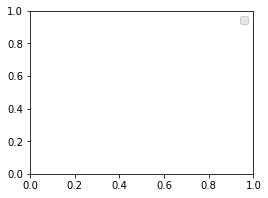

----- No data exist in directory: BO (5-1)
----- No data exist in directory: BO (7-1)
----- No data exist in directory: BO (9-1)
----- No data exist in directory: BO (11-1)
----- No data exist in directory: BO (13-1)
----- No data exist in directory: BO (15-1)


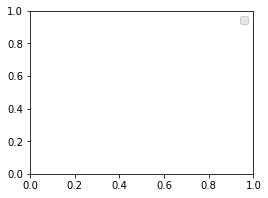

----- No data exist in directory: BO (5-2)
----- No data exist in directory: BO (7-2)
----- No data exist in directory: BO (9-2)
----- No data exist in directory: BO (11-2)
----- No data exist in directory: BO (13-2)
----- No data exist in directory: BO (15-2)


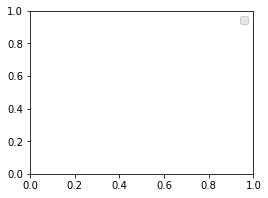

In [9]:
sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.5, 1, 2]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    index = 0
    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(4, 3))
    dn1 = 'GA (' + str(e) + ')'
    # GA_Plotter(dn1, 
    #            linestyle = '-', 
    #            color = 'k',
    #            plotDataPoints = True)
    
    for index, sn in enumerate(sensorNums):
        dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
        dn3 = 'G (' + str(sn) + '-' + str(e) + ')'
        try:
            BO_Plotter(dn2, 
                       holdplot = True, 
                       plotDataPoints = True,
                       name = dn2, 
                       e = e,
                       linestyle = styles[0][1], 
                       marker = styles[0][0],
                       color = colors[index])

            S = (((8 - e)**2) / (e**2))
            placed_sn = min(S, sn)

            Greedy_Plotter(dn3,
                       holdplot = True, 
                       plotDataPoints = True,
                       name = dn2, 
                       e = e,
                       linestyle = styles[0][1], 
                       marker = styles[0][0],
                       color = colors[index],
                       data_range = int((S * placed_sn) - ((placed_sn * (placed_sn - 1)) / 2)))

            BOnames.append('BO ' + str(sn))
            BOnames.append('Greedy ' + str(sn))


        except:
            print('----- No data exist in directory: ' + dn2)

        # plt.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
        legend = plt.legend(BOnames, ncol=2)
        legend.get_frame().set_alpha(None)
        legend.get_frame().set_facecolor((0, 0, 0, 0.1))
        # plt.grid()

    plt.show()

In [10]:
for e in [0.5, 1, 2]:
    for s in [5, 7, 9, 11, 13, 15]:

        dn1 = 'G (' + str(s) + '-' + str(e) + ')'

        try:
            print(dn1)
            Greedy_Plotter_single(dn1, 
                                  holdplot = False, 
                                  name = 'test', 
                                  e = e, 
                                  linestyle = '-', 
                                  color = 'k', 
                                  marker = '',
                                  plotDataPoints = True, 
                                  data_range = 1000)
            plt.show()
            
        except:
            print('Data not available for ', dn1)

G (5-0.5)
Data not available for  G (5-0.5)
G (7-0.5)
Data not available for  G (7-0.5)
G (9-0.5)
Data not available for  G (9-0.5)
G (11-0.5)
Data not available for  G (11-0.5)
G (13-0.5)
Data not available for  G (13-0.5)
G (15-0.5)
Data not available for  G (15-0.5)
G (5-1)
Data not available for  G (5-1)
G (7-1)
Data not available for  G (7-1)
G (9-1)
Data not available for  G (9-1)
G (11-1)
Data not available for  G (11-1)
G (13-1)
Data not available for  G (13-1)
G (15-1)
Data not available for  G (15-1)
G (5-2)
Data not available for  G (5-2)
G (7-2)
Data not available for  G (7-2)
G (9-2)
Data not available for  G (9-2)
G (11-2)
Data not available for  G (11-2)
G (13-2)
Data not available for  G (13-2)
G (15-2)
Data not available for  G (15-2)


len(maxs) 1 1000
len(maxs) 2 1000
0.0


FileNotFoundError: [Errno 2] No such file or directory: 'GA_results/BO (7-0.5)'

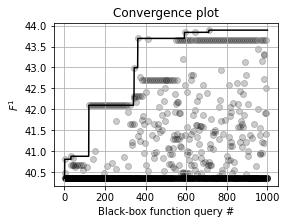

In [8]:
sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.5, 1, 2]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']

for e in epsilons:
    index = 0
    if e == 0.5: 
        sn = 7
        gsn = 5
        
    elif e == 1:
        sn = 9
        gsn = 15
        
    elif e == 2:
        sn = 5
        gsn = 7
    
    BOnames = ['GA']
    fig, ax = plt.subplots(figsize=(4, 3))
    
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter_single(dn1, 
               linestyle = '-', 
               color = 'k',
               plotDataPoints = True)
    
    
    dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
    
    dn3 = 'G (' + str(gsn) + '-' + str(e) + ')'
    
    # try:
    BO_Plotter_single(dn2, 
               holdplot = True, 
               plotDataPoints = True,
               name = dn2, 
               e = e,
               linestyle = styles[0][1], 
               marker = styles[0][0],
               color = 'r')

    S = (((8 - e)**2) / (e**2))
    placed_sn = min(S, gsn)
    dr = int((S * placed_sn) - ((placed_sn * (placed_sn - 1)) / 2))
    dr = min(dr, 1000)
    print('e', e)
    print('placed_sn', placed_sn)
    print('S', S)
    print(dr)

    Greedy_Plotter_single(dn3, 
               holdplot = True, 
               plotDataPoints = True,
               name = dn3, 
               e = e,
               linestyle = styles[0][1], 
               marker = styles[0][0],
               color = 'b',
               data_range = dr)

    BOnames.append('BO ' + str(sn))

    # except:
    #     print('----- No data exist in directory: ' + dn2)

    # plt.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
    legend = plt.legend(['GA', 'BO ' + str(sn), 'Greedy ' + str(gsn)], loc = 'upper left')
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 0, 0.1))
    # plt.grid()
    # plt.grid()

    plt.show()

# Sensor Locations Animation

In [20]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  if testbed == './Testbed1/':
    extent = [0.0, 8.0, 0.4, 8.0]

  elif testbed == './Testbed2/':
    extent = [0.0, 5.3, 0.4, 8.0]

  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  # cb = plt.colorbar()
  # cb.set_label("Occupants presence probability")

def get_sensor_locations(c, epsilon):
    print(c)
    print(epsilon)
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    Ts = []
    
    [str(item/255.) if item > 1 else 'r' for item in Ts]
    
    for key in coordinates.keys():
        if 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
        
    for key in coordinates.keys():
        if 't_o' in key:
            Ts.append(coordinates[key])
        
    for key in coordinates.keys():
        if 'x' in key:
            Xs.append(coordinates[key])
            Ts.append(1)
        
    for key in coordinates.keys():
        if 'y' in key:
            Ys.append(coordinates[key])
        
        '''
        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key] / epsilon)
            
        elif 'y' in key:
            Ys.append(coordinates[key] / epsilon)

        elif 'object' in key:
            Xs.append(float(coordinates[key].split(',')[0]))
            Ys.append(float(coordinates[key].split(',')[1]))
            
        elif 't_' in key:
            Ts.append(coordinates[key])
            
        '''
            
    return Xs, Ys, Ts

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [21]:
def plot_sensor_locations(sensorNum, epsilon, method, filenumber):
    import SensorOptimizers.BayesianOptimization as bo
    import SensorOptimizers.GeneticAlgorithm as ga
    
    if method == 'BO':            
        results = boi.read_files('Final Results (Random Initial State)/BO (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        result = results[filenumber]
        data = [100 - p for p in result.perfs]
        title = 'BO performance: ' + str(max(data))
        
    elif method == 'G':
        results = boi.read_files('Final Results (Random Initial State)/G (' + 
                                 str(sensorNum) + 
                                 '-' + 
                                 str(epsilon) + ')')
        
        best_result = -1
        best_index = -1
        #result = results[filenumber]
        for index, result in enumerate(results):
        
            data = []
            sensor_num = []

            result_for_print = result

            for generation in result_for_print:
                for chromosome in generation:
                    try:
                        data.append(chromosome[0][0])
                    except:
                        pass
            if (max(data) > best_result):
                best_index = index
                best_result = max(data)
 
        title = 'Greedy performance: ' + str(best_result)
        
    elif method == 'GA':
        results = boi.read_files('Final Results (Random Initial State)/GA (' + 
                                 str(epsilon) + 
                                 ')')
        best_result = -1
        best_index = -1
        #result = results[filenumber]
        for index, result in enumerate(results):
        
            data = []
            sensor_num = []

            result_for_print = result

            for generation in result_for_print:
                for chromosome in generation:
                    try:
                        data.append(chromosome[0][0])
                    except:
                        pass
            if (max(data) > best_result):
                best_index = index
                best_result = max(data)
 
        title = 'GA performance: ' + str(best_result)
        
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        
        # matrix, labels = bo.get_confusion_matrix(c)
        matrix, labels = [], []
        
        Xs, Ys, Ts = get_sensor_locations(c, epsilon)
        
        
    elif method == 'GA' or method == 'G':
        result = results[best_index]
        _, configurations = result
        config = configurations[-1]
        print(config)
        data = config.GetSensorLocations()[0]
        
        # matrix, labels = ga.get_confusion_matrix(config)
        matrix, labels = [], []
        
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces(testbed + "/Agent Trace Files ROS")
    #for i in range(len(Xs)):
    xlim=(-0.2, 8.2)
    ylim=(-0.3, 8.2)

    if method == 'GA':
        plt.scatter(Xs, Ys, marker = 7, color='b')
        
    elif method == 'G':
        print('Xs ', Xs)
        plt.scatter(Xs, Ys, marker = ">", color='b')

    elif method == 'BO':
        # colors = [str(item/255.) if item > 1 else 'r' for item in Ts]
        
        plt.scatter([xx * epsilon for xx in Xs], [yy * epsilon for yy in Ys], marker = "^", color = 'r')
        
        Cs = {3: 'b', 4: 'm', 5: 'k'}
        
        '''FOR DIFFERENT SENSOR TYPES
        for i in range(len(Xs)):
            if Ts[i] == 1:
                plt.scatter(Xs[i], Ys[i], marker = 6, color = 'r')
                
            else:
                print(Xs[i])
                print(Ys[i])
                plt.scatter(Xs[i], Ys[i], marker = "o", color = Cs[Ts[i]])
        '''    
        
        
        '''
        A = list([*zip(Xs, Ys)])
        print(type(A[0]))
        res = list(set([ele for ele in A if A.count(ele) > 1]))
        if len(res) > 0:
            for p in res:
                plt.scatter(p[1] + 0.15, p[0], marker = 6, color='r', label='_nolegend_')
        '''

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread(testbed + "/case study (IFC).png")
    if testbed == './Testbed1':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 8.2, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 8.22])
        ax.set_ylim([-0.22, 8.22])

    if testbed == './Testbed2':
        im = plt.imshow(np.flipud(img), origin='upper', extent=[-0.2, 5.3, -0.2, 8.2])
        HM(agent_x, agent_y)
        ax.set_xlim([-0.22, 5.53])
        ax.set_ylim([-0.22, 8.22])
    
    plt.gca().invert_yaxis()

    # display.clear_output(wait=True)
    # display.display(pl.gcf())
    return title, matrix, labels

****************************************************************************************************
epsilon: 0.5
****************************************************************************************************


UnboundLocalError: local variable 'extent' referenced before assignment

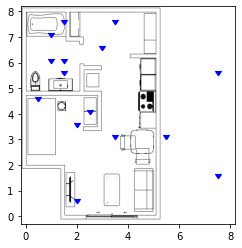

In [22]:
for epsilon in [0.5, 1, 2]:
    print('*' * 100)
    print('epsilon: ' + str(epsilon))
    print('*' * 100)

    #### Chooses the best sensor numbers for each epsilon
    if epsilon == 0.5: sensorNum = 7
    if epsilon == 1: sensorNum = 9
    if epsilon == 2: sensorNum = 5
        
    if epsilon == 0.5: sensorNumG = 5
    if epsilon == 1: sensorNumG = 11
    if epsilon == 2: sensorNumG = 7
    
    for filenumber1 in [0, 1, 2, 3, 4]:
        if epsilon == 0.5: filenumber1 = 1
        elif epsilon == 1: filenumber1 = 4
        elif epsilon == 2: filenumber1 = 1
            
        if epsilon == 0.5: filenumber1G = 1
        elif epsilon == 1: filenumber1G = 4
        elif epsilon == 2: filenumber1G = 1
    ####
        import matplotlib.pyplot as plt

        if testbed == './Testbed1/':
            fig, ax = plt.subplots(figsize=(5.0, 5.0), dpi=80)

        elif testbed == './Testbed2/':
            fig, ax = plt.subplots(figsize=(3.3, 5.0), dpi=80)

        
        # title, matrix, labels = plot_sensor_locations(sensorNum, epsilon, 'BO', filenumber1)
        # bo_title = title
        # bo_matrix = matrix
        # bo_labels = labels

        title, matrix, labels = plot_sensor_locations(sensorNum, epsilon, 'GA', -1)
        ga_title = title
        ga_matrix = matrix
        ga_labels = labels
        
        # title, matrix, labels = plot_sensor_locations(sensorNumG, epsilon, 'G', filenumber1G)
        # ga_title = title
        # ga_matrix = matrix
        # ga_labels = labels
        

        legend = plt.legend(['BO sensor locations', 'GA sensor locations'])
        legend.get_frame().set_alpha(None)
        legend.get_frame().set_facecolor((0, 0, 0, 0.1))
        # plt.grid()
        # plt.title(ga_title + " : " + bo_title)

        plt.show()
        
        break

In [ ]:
labels = ['Undress', 
          'Take a shower', 
          'Dress', 
          'Iron', 
          'Sit and work with tablet', 
          'Exercise', 
          'Use toilet',
          'Wash hands', 
          'Watch TV', 
          'Grab ingredients from fridge',
          'Make tea', 
          'Toast breads', 
          'Grab utensils',
          'Fry eggs using stove', 
          'Eat', 
          'Take medicine',
          'Wipe dining table', 
          'Clean kitchen', 
          'Wash dishes', 
          'Grab the broom from storage',
          'Broom', 
          'Return the broom', 
          'Sleep']


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = bo_matrix[0]

# cm = np.nan_to_num(cm)



for m in range(1, len(bo_matrix)):
    cm += np.nan_to_num(bo_matrix[m])

cm = cm/5

normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T
cmn = normed_c

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = ga_matrix[4]

# for m in range(1, len(ga_matrix)):
#     cm += ga_matrix[m]
    
    
# cm = cm/5

    
# for m in bo_matrix:    
normed_c = (cm.T / cm.astype(np.float).sum(axis=1)).T

cmn = normed_c
# cmn = cm

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmn, cmap = plt.cm.viridis, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, linewidths=1, linecolor='grey')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

# Statistics

In [ ]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [ ]:
statistic

In [ ]:
pvalue

In [ ]:
import seaborn as sns

compare_pvalue = compare(pvalue, 0.05)

for epsilon in ['0.5', '1', '2']:
    sn = '1'

    rows = ['GA (' + epsilon + ')',
            'BO (5' '-' + epsilon + ')',
            'BO (7' + '-' + epsilon + ')',
            'BO (9' + '-' + epsilon + ')',
            'BO (11' + '-' + epsilon + ')',
            'BO (13' + '-' + epsilon + ')',
            'BO (15' + '-' + epsilon + ')',
           ]

    df = compare_pvalue.filter(like=epsilon + ')').loc[rows]
    sns.heatmap(df, annot=True, cmap="binary")
    plt.show()

In [ ]:
sns.heatmap(df, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df2, annot=True, cmap="binary")

In [ ]:
sns.heatmap(df3, annot=True, cmap="binary")

In [ ]:
compare_pvalue

In [ ]:
accuracies

In [ ]:
BO05 = [72.4, 76.5, 73.4, 74.1, 75.2, 75.3]
BO1 = [68.4, 72.8, 75.3, 71.3, 73.2, 70.7]
BO2 = [58.6, 55.4, 55.5, 54.7, 56.8, 57.3]

print(np.mean(BO05))
print(np.std(BO05))
print('---')
print(np.mean(BO1))
print(np.std(BO1))
print('---')
print(np.mean(BO2))
print(np.std(BO2))

ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO1),  std2=np.std(BO1), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

In [ ]:
ttest_ind_from_stats(mean1=np.mean(BO1), std1=np.std(BO1), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)